# Import

In [149]:
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Utils
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Functions

In [150]:
def plot_correlation_matrix(dataframe, plot_graph=True, return_matrix=False):
    """
    Calculates and optionally plots the lower triangle (including the diagonal) of the correlation matrix 
    of a given DataFrame.
    
    Parameters:
    - dataframe: DataFrame from which to calculate the correlation matrix.
    - plot_graph: If True, displays a heatmap of the lower triangle of the correlation matrix.
    - return_matrix: If True, returns the correlation matrix.
    
    Returns:
    - If return_matrix is True, returns the correlation matrix of the dataframe.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataframe.corr('spearman')
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Plot the correlation matrix heatmap for the lower triangle if requested
    if plot_graph:
        plt.figure(figsize=(40, 30))
        # Use the mask and specify square=True to ensure the heatmap is square shaped
        sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, center=0, cmap="hot", annot=True, fmt=".2f", square=False)
        plt.xticks(rotation=45, horizontalalignment='right')
    
    # Return the correlation matrix if requested
    if return_matrix:
        return correlation_matrix

In [151]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,), True labels of the data.
    - y_pred: array-like of shape (n_samples,), Predicted labels.

    Returns:
    - None, displays a confusion matrix.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    # Create a DataFrame for Seaborn's heatmap
    # Define labels after define the dataset to train.
    class_labels = ["MOVE", "SPX", "SX5E"]
    confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

    # Plotting the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_df, annot=True, fmt="g", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    print(classes)
    print("Los valores de las etiquetas de validación y_val son: ")
    print(pd.DataFrame(y_true).value_counts().to_dict())

In [152]:
def high_correlation_features(dataframe, threshold=0.95):
    """
    Identifies and returns pairs of highly correlated features from the given dataframe.

    Parameters:
    - dataframe: A pandas DataFrame containing the dataset.
    - threshold: A float representing the correlation threshold to identify high correlations.

    Returns:
    - A DataFrame with pairs of features that have a correlation coefficient above the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with a correlation above the threshold
    # Note: The matrix is symmetric, so we need to filter out one side to avoid duplicates
    high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .reset_index())
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corr_pairs = high_corr_pairs.loc[abs(high_corr_pairs['Correlation']) > threshold, :]

    return high_corr_pairs

# Read

Features de las que desconocemos su detalle

In [153]:
df_x = pd.read_csv('./x_train.csv')
df_x.tail()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
2019,-0.134108,-0.142738,0.077398,-0.052656,-0.223050,-0.024748,0.051775,0.225418,0.016313,0.203651,...,-0.153466,0.119594,0.041444,-0.234165,0.024491,-0.309568,0.324702,-0.276497,-0.004959,-0.320971
2020,-0.195736,-0.387907,0.320228,0.165131,-0.110947,-0.112957,0.218435,0.383855,-0.047947,0.187719,...,0.206781,-0.097978,-0.012083,-0.240991,0.008867,-0.388769,0.221236,-0.012026,0.026120,-0.178799
2021,-0.175762,-0.019424,-0.084928,-0.072786,-0.068806,-0.081929,-0.045627,0.274146,0.235335,0.114931,...,-0.280163,0.069029,0.146151,-0.255648,-0.111431,-0.251150,0.245139,-0.012150,0.026396,-0.624170
2022,0.094857,-0.019395,0.125970,-0.028764,-0.241570,-0.020699,-0.032222,0.003480,0.209894,0.165685,...,-0.239647,0.025610,-0.003960,0.016724,-0.043390,-0.004722,0.162544,-0.059068,0.221578,0.111782
2023,-0.105337,-0.107708,0.436254,0.082409,-0.188900,-0.016179,0.376869,0.374280,-0.006386,0.114953,...,-0.002830,-0.114155,0.166000,-0.373506,-0.156187,-0.331361,0.123601,0.148411,-0.275720,-0.343218


In [154]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Columns: 768 entries, embed_0 to embed_767
dtypes: float64(768)
memory usage: 11.9 MB


In [155]:
nulls = df_x.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

No se tienen valores nulos.

## Información de las variaciones en los mercados.

Información con distinta periocidad, elegir o crear una etiqueta multiclase.

In [156]:
df_y = pd.read_csv('./y_train.csv')
df_y.tail()

,Unnamed: 0,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,...,Diff_SPX_2w,Diff_SRVIX_1d,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w
2019,2019,0.19,1.05,1.16,-0.2837,1.9222,2.3049,-0.0073,0.0010,0.0109,...,-40.16,-0.19,-0.93,-2.46,0.05,-0.20,-0.51,0.4068,0.1582,-6.8608
2020,2020,-0.30,-1.46,-0.89,-0.0579,-0.7446,-0.9850,0.0010,0.0075,0.0190,...,-19.66,0.14,-0.20,-1.47,0.03,0.04,0.15,1.5554,-3.2464,-0.8386
2021,2021,0.59,1.00,1.46,1.0247,1.0891,1.1375,0.0018,-0.0124,-0.0214,...,-51.60,0.36,2.77,2.59,0.08,-0.26,-0.37,0.7910,3.6757,3.6513
2022,2022,0.12,-0.60,-0.49,0.5572,-3.2779,-3.1172,-0.0029,-0.0258,-0.0125,...,29.10,0.12,0.34,0.51,0.15,0.02,-0.19,0.7321,3.2044,3.7662
2023,2023,-0.40,0.59,-2.45,-0.3327,-0.3465,-3.8517,0.0001,0.0076,0.0007,...,8.16,-0.04,-1.31,-0.64,0.05,0.19,0.38,1.4900,2.5800,4.7100


Comenzaré por identicar los mercados financieros, leeré los titulos de las columnas e identificaré los nombres de los mercados.

In [157]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2024 non-null   int64  
 1   Diff_VIX_1d        2024 non-null   float64
 2   Diff_VIX_1w        2024 non-null   float64
 3   Diff_VIX_2w        2024 non-null   float64
 4   Diff_V2X_1d        2024 non-null   float64
 5   Diff_V2X_1w        2024 non-null   float64
 6   Diff_V2X_2w        2024 non-null   float64
 7   Diff_EURUSD_1d     2024 non-null   float64
 8   Diff_EURUSD_1w     2024 non-null   float64
 9   Diff_EURUSD_2w     2024 non-null   float64
 10  Diff_EURUSDV1M_1d  2024 non-null   float64
 11  Diff_EURUSDV1M_1w  2024 non-null   float64
 12  Diff_EURUSDV1M_2w  2024 non-null   float64
 13  Diff_USGG10YR_1d   2024 non-null   float64
 14  Diff_USGG10YR_1w   2024 non-null   float64
 15  Diff_USGG10YR_2w   2024 non-null   float64
 16  Diff_USGG2YR_1d    2024 

In [158]:
df_y.describe()

,Unnamed: 0,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,...,Diff_SPX_2w,Diff_SRVIX_1d,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,...,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,1011.500000,-0.029234,-0.117456,-0.027223,-0.049351,0.010143,0.062605,-0.000035,-0.000161,-0.000520,...,-5.837959,0.030015,-0.038622,-0.026621,0.006539,-0.008258,-0.005668,0.008348,-0.379388,-0.488567
std,584.422792,1.917336,3.707284,4.673525,1.871708,3.673926,5.034786,0.006809,0.016425,0.024052,...,65.153227,0.601691,1.811144,2.300569,0.289173,0.639594,0.892612,3.751794,8.846259,11.874685
min,0.000000,-20.010000,-27.090000,-49.270000,-22.059700,-26.483300,-49.502000,-0.042700,-0.090000,-0.169100,...,-316.670000,-5.640000,-25.930000,-15.660000,-2.288200,-8.759500,-7.230000,-34.900000,-58.810000,-73.800000
25%,505.750000,-0.600000,-1.370000,-1.620000,-0.656425,-1.478150,-2.023550,-0.003800,-0.009300,-0.013800,...,-38.007500,0.000000,-0.170000,-0.362500,-0.100000,-0.260000,-0.330000,-1.299100,-3.865100,-5.300000
50%,1011.500000,0.070000,0.100000,0.170000,0.035100,0.182400,0.311800,-0.000200,0.000050,-0.000800,...,-11.635000,0.000000,0.000000,0.000000,0.010000,0.020000,0.050000,0.300000,0.309950,0.500000
75%,1517.250000,0.720000,1.510000,2.090000,0.768400,1.745650,2.466975,0.003600,0.009000,0.012925,...,19.135000,0.100000,0.300000,0.440000,0.128883,0.280000,0.440057,1.600000,3.900000,5.284500
max,2023.000000,14.960000,26.380000,20.080000,13.987300,26.747700,21.370100,0.026000,0.074700,0.120300,...,704.100000,6.620000,7.640000,13.880000,2.508800,3.228300,4.432000,23.900000,57.300000,63.800000


Total de mercados financieros

In [159]:
columns = list(df_y.columns)
columns = columns[1:]
mercados = list(set([x[5:-3] for x in columns]))
mercados

['VIX',
 'GDBR10YR',
 'EURUSD',
 'SPX',
 'EURUSDV1M',
 'MOVE',
 'USGG10YR',
 'SRVIX',
 'GDBR2YR',
 'USGG2YR',
 'CVIX',
 'SX5E',
 'V2X']

In [160]:
#Creo un df convierte los valores a su valores absoluto.
df_y_abs = df_y.abs()
df_y_abs.describe()

,Unnamed: 0,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,...,Diff_SPX_2w,Diff_SRVIX_1d,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,...,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,1011.500000,1.122712,2.294432,2.897451,1.158911,2.414394,3.282043,0.004995,0.012188,0.017454,...,42.900094,0.271369,0.835637,1.200267,0.181817,0.399659,0.560958,2.366415,5.870660,7.787295
std,584.422792,1.554324,2.913887,3.666498,1.470370,2.768692,3.817835,0.004626,0.011008,0.016553,...,49.373209,0.537826,1.607203,1.962644,0.224922,0.499342,0.694232,2.910900,6.627112,8.976358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001100,0.001100,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,505.750000,0.280000,0.600000,0.830000,0.331300,0.678025,0.961675,0.001800,0.004400,0.006275,...,14.077500,0.000000,0.000000,0.000000,0.049225,0.130000,0.170000,0.600000,1.700000,2.300000
50%,1011.500000,0.680000,1.445000,1.890000,0.717300,1.640350,2.264800,0.003700,0.009200,0.013300,...,29.750000,0.050000,0.230000,0.380000,0.120000,0.260750,0.390000,1.431300,3.900000,5.300000
75%,1517.250000,1.350000,2.900000,3.682500,1.495425,3.199525,4.264375,0.006900,0.016900,0.023000,...,55.240000,0.330000,1.092500,1.540000,0.230000,0.501500,0.706830,3.100000,7.458075,9.700000
max,2023.000000,20.010000,27.090000,49.270000,22.059700,26.747700,49.502000,0.042700,0.090000,0.169100,...,704.100000,6.620000,25.930000,15.660000,2.508800,8.759500,7.230000,34.900000,58.810000,73.800000


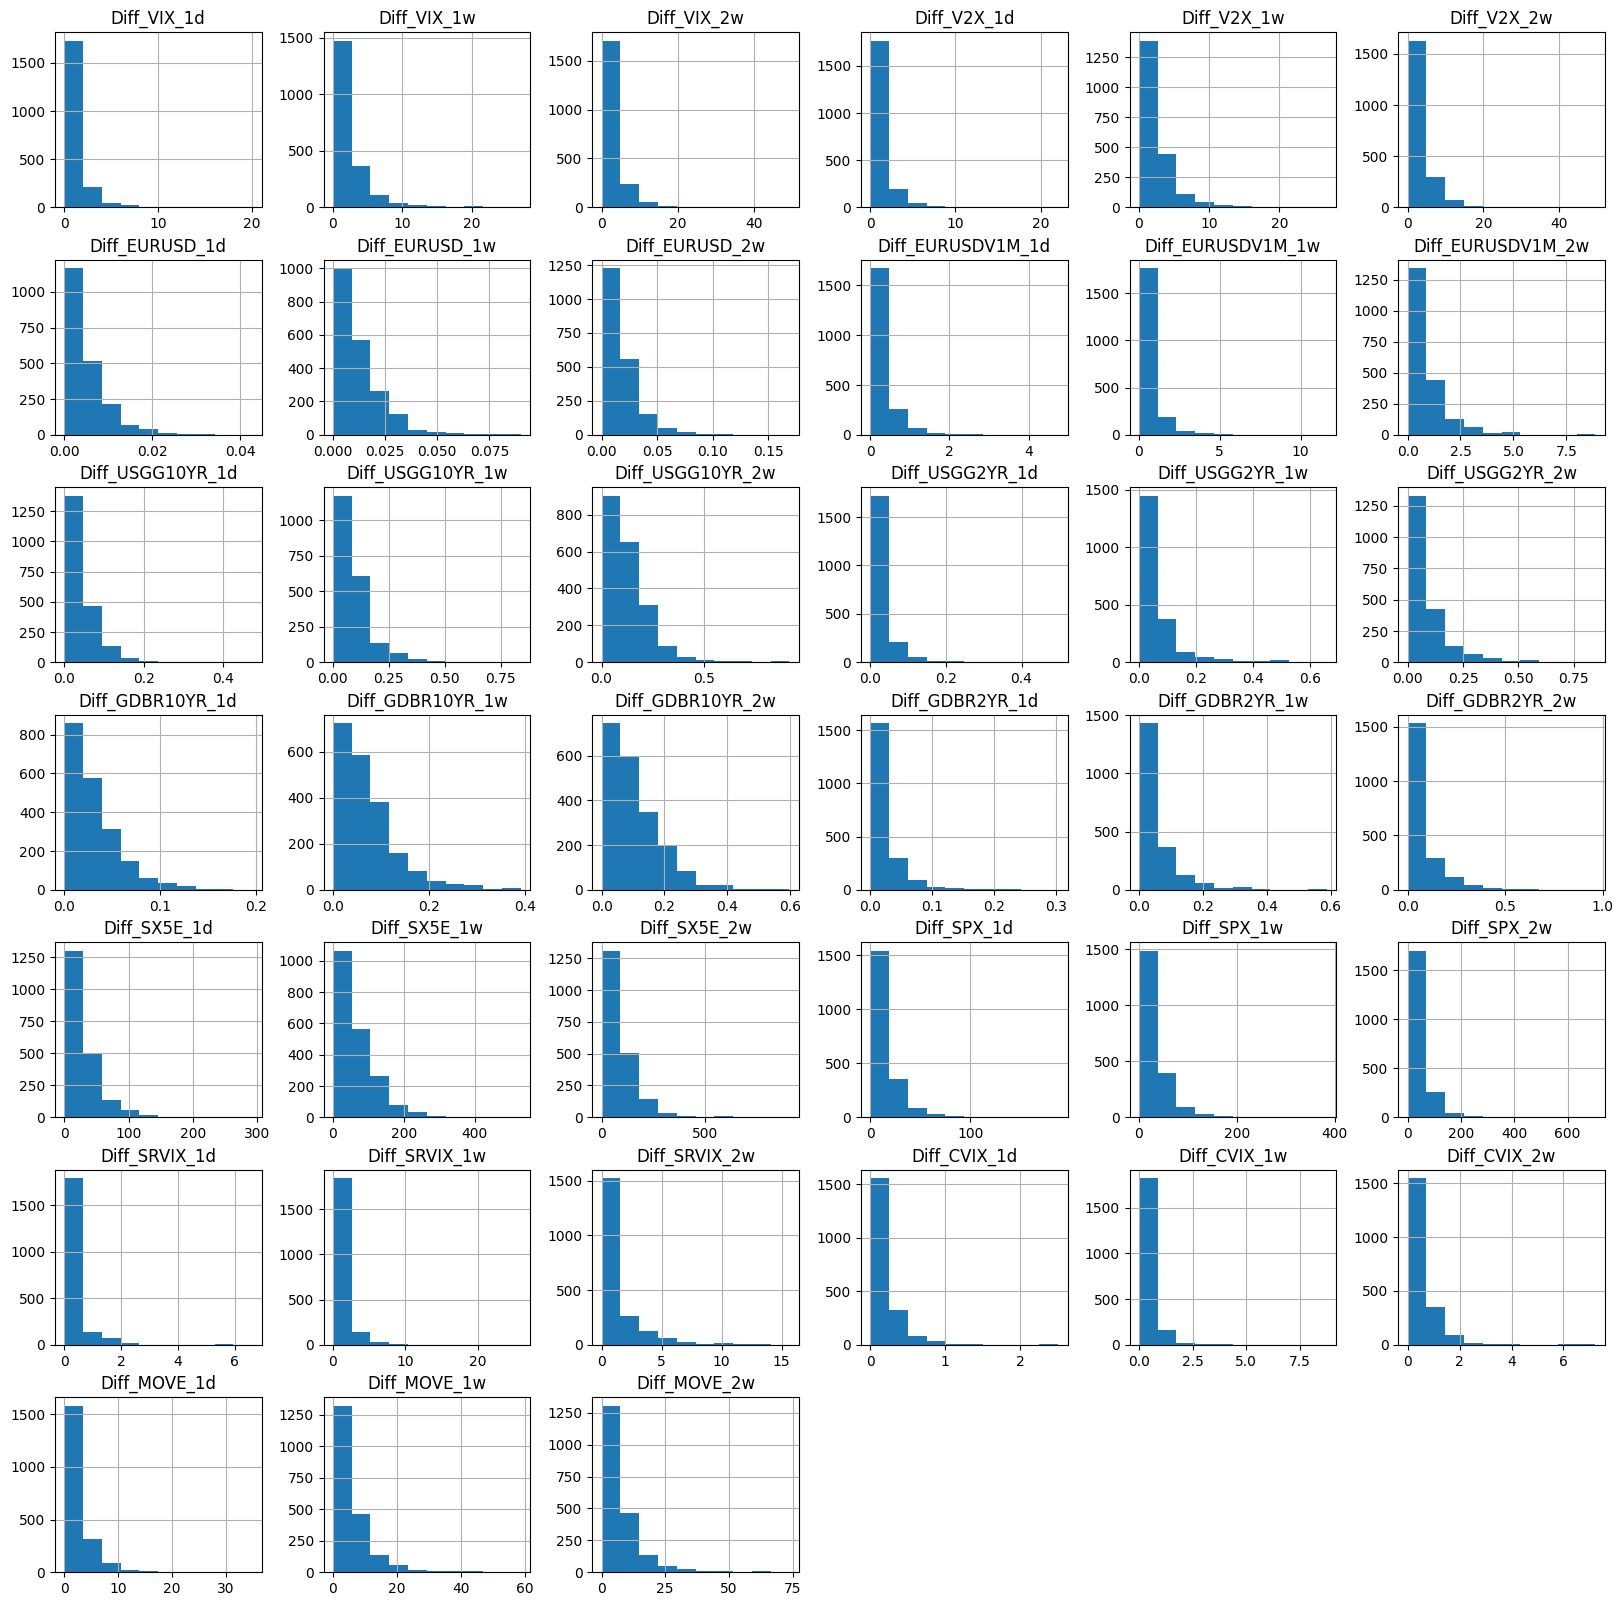

In [161]:
df_y_abs.iloc[:,1:].hist(figsize = (20,20))
plt.show()

La intención de gráficar la variación de los mercados, era identificar si alguna temporalidad tiene la mayoría de valores máximos, por ejemplo, en la temporalidad de dos semanas se encuentran la mayoría de los valores máximos. Al revisar las escalas notó que en algunos casos los valores no tienen una temporalidad dominante.

# ETL

Como resultado de que los valores máximos no tienen una temporalidad predominante y en prespectiva son periodos de tiempo cortos, identicaré la columna en donde se encuentra el valor máximo por renglón y solo conservaré el nombre del mercado.  

In [162]:
df_y_abs.drop(columns='Unnamed: 0', inplace = True)
df_y_abs

,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,Diff_EURUSDV1M_1d,...,Diff_SPX_2w,Diff_SRVIX_1d,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w
0,0.09,0.91,0.78,0.4476,0.2496,1.1221,0.0067,0.0038,0.0053,0.0250,...,24.41,0.00,0.00,0.00,0.060258,0.182817,0.09745,0.4500,0.5500,1.8500
1,0.40,0.01,3.83,2.4391,0.7112,6.1795,0.0048,0.0034,0.0046,0.3675,...,61.86,0.16,0.97,0.17,0.120000,0.090000,0.92000,0.1082,0.9718,1.9018
2,1.54,1.86,1.56,0.3430,2.2993,2.3575,0.0016,0.0039,0.0088,0.3150,...,48.17,0.10,3.02,3.74,0.140000,0.170000,0.20000,0.2249,0.3166,2.8408
3,0.06,0.99,3.58,0.2026,2.4894,2.0213,0.0099,0.0212,0.0409,0.3350,...,23.16,0.00,0.00,0.00,0.383900,0.175300,0.75820,1.1000,11.0000,5.6000
4,0.14,0.07,1.69,0.2685,1.3956,3.3027,0.0059,0.0352,0.0420,0.0150,...,40.07,0.05,2.20,6.30,0.170000,0.090000,1.37000,0.5353,11.5193,25.4624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.19,1.05,1.16,0.2837,1.9222,2.3049,0.0073,0.0010,0.0109,0.0250,...,40.16,0.19,0.93,2.46,0.050000,0.200000,0.51000,0.4068,0.1582,6.8608
2020,0.30,1.46,0.89,0.0579,0.7446,0.9850,0.0010,0.0075,0.0190,0.0575,...,19.66,0.14,0.20,1.47,0.030000,0.040000,0.15000,1.5554,3.2464,0.8386
2021,0.59,1.00,1.46,1.0247,1.0891,1.1375,0.0018,0.0124,0.0214,0.1900,...,51.60,0.36,2.77,2.59,0.080000,0.260000,0.37000,0.7910,3.6757,3.6513
2022,0.12,0.60,0.49,0.5572,3.2779,3.1172,0.0029,0.0258,0.0125,0.0375,...,29.10,0.12,0.34,0.51,0.150000,0.020000,0.19000,0.7321,3.2044,3.7662


In [163]:
df_y_abs['Max_Col_Value'] = df_y_abs.idxmax(axis=1)
df_y_abs['Class'] = df_y_abs['Max_Col_Value'].apply(lambda x: x[5:-3]) 

In [164]:
df_y_abs

,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,Diff_EURUSDV1M_1d,...,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w,Max_Col_Value,Class
0,0.09,0.91,0.78,0.4476,0.2496,1.1221,0.0067,0.0038,0.0053,0.0250,...,0.00,0.00,0.060258,0.182817,0.09745,0.4500,0.5500,1.8500,Diff_SX5E_2w,SX5E
1,0.40,0.01,3.83,2.4391,0.7112,6.1795,0.0048,0.0034,0.0046,0.3675,...,0.97,0.17,0.120000,0.090000,0.92000,0.1082,0.9718,1.9018,Diff_SX5E_2w,SX5E
2,1.54,1.86,1.56,0.3430,2.2993,2.3575,0.0016,0.0039,0.0088,0.3150,...,3.02,3.74,0.140000,0.170000,0.20000,0.2249,0.3166,2.8408,Diff_SPX_2w,SPX
3,0.06,0.99,3.58,0.2026,2.4894,2.0213,0.0099,0.0212,0.0409,0.3350,...,0.00,0.00,0.383900,0.175300,0.75820,1.1000,11.0000,5.6000,Diff_SX5E_1w,SX5E
4,0.14,0.07,1.69,0.2685,1.3956,3.3027,0.0059,0.0352,0.0420,0.0150,...,2.20,6.30,0.170000,0.090000,1.37000,0.5353,11.5193,25.4624,Diff_SX5E_2w,SX5E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.19,1.05,1.16,0.2837,1.9222,2.3049,0.0073,0.0010,0.0109,0.0250,...,0.93,2.46,0.050000,0.200000,0.51000,0.4068,0.1582,6.8608,Diff_SX5E_2w,SX5E
2020,0.30,1.46,0.89,0.0579,0.7446,0.9850,0.0010,0.0075,0.0190,0.0575,...,0.20,1.47,0.030000,0.040000,0.15000,1.5554,3.2464,0.8386,Diff_SX5E_2w,SX5E
2021,0.59,1.00,1.46,1.0247,1.0891,1.1375,0.0018,0.0124,0.0214,0.1900,...,2.77,2.59,0.080000,0.260000,0.37000,0.7910,3.6757,3.6513,Diff_SPX_2w,SPX
2022,0.12,0.60,0.49,0.5572,3.2779,3.1172,0.0029,0.0258,0.0125,0.0375,...,0.34,0.51,0.150000,0.020000,0.19000,0.7321,3.2044,3.7662,Diff_SX5E_2w,SX5E


## Dataset

Es momento de crear un dataset que con tenga las features y las clases para poder entrenarlo con distintos modelos y realizar predicciones.

In [165]:
df = pd.concat([df_x, df_y_abs[['Class']]], axis = 1)
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Class
0,-0.593896,-0.064762,0.037443,-0.204985,-0.020191,-0.011442,-0.037963,-0.298239,-0.040236,0.546839,...,-0.199293,0.051006,0.270629,-0.070993,-0.049700,0.183429,-0.659867,0.085300,0.090459,SX5E
1,-0.089499,-0.166100,0.122766,0.104867,0.008371,-0.074680,0.052226,0.569398,-0.029840,-0.033208,...,0.083387,-0.132592,-0.766148,-0.323153,-0.453999,0.173123,0.281454,-0.064343,-0.133666,SX5E
2,0.013104,-0.290522,0.461759,-0.005823,0.055795,-0.102498,0.061132,0.434192,-0.164281,0.076892,...,0.224350,-0.093638,-0.382246,-0.217971,-0.454239,0.082005,0.124396,-0.011094,-0.210619,SPX
3,-0.454174,0.121775,0.191489,-0.048016,-0.105496,-0.216831,-0.173918,-0.101547,-0.209740,0.015478,...,-0.006138,-0.038534,0.297223,0.057184,0.321524,-0.344735,-0.362957,-0.032909,0.134404,SX5E
4,-0.471450,-0.109883,0.199362,-0.114269,-0.105862,-0.126005,0.099511,-0.063115,0.063890,0.042452,...,-0.128025,0.083945,0.260165,-0.056105,0.339414,-0.006278,-0.446322,-0.017794,-0.002816,SX5E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-0.134108,-0.142738,0.077398,-0.052656,-0.223050,-0.024748,0.051775,0.225418,0.016313,0.203651,...,0.119594,0.041444,-0.234165,0.024491,-0.309568,0.324702,-0.276497,-0.004959,-0.320971,SX5E
2020,-0.195736,-0.387907,0.320228,0.165131,-0.110947,-0.112957,0.218435,0.383855,-0.047947,0.187719,...,-0.097978,-0.012083,-0.240991,0.008867,-0.388769,0.221236,-0.012026,0.026120,-0.178799,SX5E
2021,-0.175762,-0.019424,-0.084928,-0.072786,-0.068806,-0.081929,-0.045627,0.274146,0.235335,0.114931,...,0.069029,0.146151,-0.255648,-0.111431,-0.251150,0.245139,-0.012150,0.026396,-0.624170,SPX
2022,0.094857,-0.019395,0.125970,-0.028764,-0.241570,-0.020699,-0.032222,0.003480,0.209894,0.165685,...,0.025610,-0.003960,0.016724,-0.043390,-0.004722,0.162544,-0.059068,0.221578,0.111782,SX5E


In [166]:
df['Class'].value_counts()

Class
SX5E    1729
SPX      293
MOVE       2
Name: count, dtype: int64

Se tiene un total de 3 clases, las cuales están muy desbalanceadas.

# Model

In [167]:
X = df.drop(['Class'], axis = 1)
y = df['Class'].values

In [168]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [169]:
dict_classes = dict(
    zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_)
)
dict_classes

{np.int64(0): 'MOVE', np.int64(1): 'SPX', np.int64(2): 'SX5E'}

In [170]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

# Display the shapes of the training and validation sets to confirm successful preprocessing
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1619, 768), (405, 768), (1619,), (405,))

## AdaBoost

In [171]:
# Initialize the AdaBoost classifier with a base estimator
ada_boost_cl = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=50,
    algorithm="SAMME",
    learning_rate=0.1, #Hay un trade-off entre el numero de estimadores y el learning rate
)

In [172]:
#Fit the classifier
ada_boost_cl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.1)

In [173]:
# Predict on the validation set
y_pred_ada = ada_boost_cl.predict(X_val)

In [174]:
print(classification_report(y_val, y_pred_ada))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.23      0.22      0.23        49
           2       0.89      0.89      0.89       355

    accuracy                           0.81       405
   macro avg       0.37      0.37      0.37       405
weighted avg       0.81      0.81      0.81       405



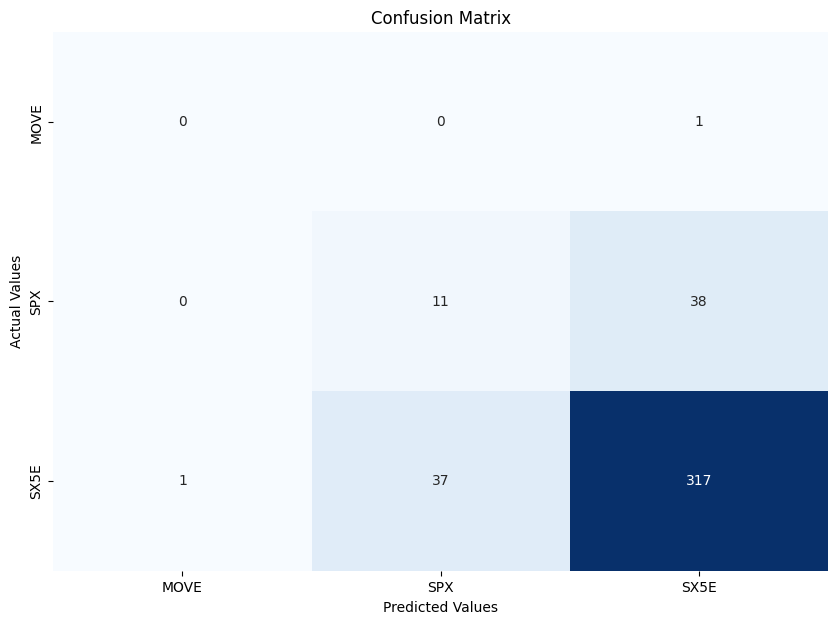

{np.int64(0): 'MOVE', np.int64(1): 'SPX', np.int64(2): 'SX5E'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 355, (1,): 49, (0,): 1}


In [175]:
plot_confusion_matrix(y_val, y_pred_ada, dict_classes)

## Multinomial Logistic Regression
Un enfoque alternativo a la Regresion Logística consiste en cambiar el modelo de regresión logística para que admita directamente la predicción de múltiples etiquetas de clase. En concreto, para predecir la probabilidad de que un ejemplo de entrada pertenezca a cada etiqueta de clase conocida.

La distribución de probabilidad que define las probabilidades multiclase se denomina distribución de probabilidad multinomial. Un modelo de regresión logística adaptado para aprender y predecir una distribución de probabilidad multinomial se denomina regresión logística multinomial. De forma similar, podríamos referirnos a la regresión logística estándar o por defecto como Regresión Logística Binomial.

Regresión logística binomial: Regresión logística estándar que predice una probabilidad binomial (es decir, para dos clases) para cada ejemplo de entrada.

Regresión logística multinomial: Versión modificada de la regresión logística que predice una probabilidad multinomial (es decir, más de dos clases) para cada ejemplo de entrada.

In [176]:
# Initialize and train the Logistic Regression model with the 'multinomial' option
mnr_cl = LogisticRegression(
    solver="newton-cg",
    max_iter=100,
    C=1, # Peso de la regularización L2
    class_weight='balanced',
    verbose=True,
    multi_class='multinomial',
)

In [177]:
mnr_cl.fit(X_train, y_train)

/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Newton-CG iter = 0
  Check Convergence
    max |gradient| <= tol: 0.13841445104136005 <= 0.0001 False
Newton-CG iter = 1
  Check Convergence
    max |gradient| <= tol: 0.11070744252425924 <= 0.0001 False
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 0.03857354467758871 <= 0.0001 False
Newton-CG iter = 3
  Check Convergence
    max |gradient| <= tol: 0.010286687403486355 <= 0.0001 False
Newton-CG iter = 4
  Check Convergence
    max |gradient| <= tol: 0.005136984793247416 <= 0.0001 False
Newton-CG iter = 5
  Check Convergence
    max |gradient| <= tol: 0.005905872554347117 <= 0.0001 False
Newton-CG iter = 6
  Check Convergence
    max |gradient| <= tol: 0.001900870913500026 <= 0.0001 False
Newton-CG iter = 7
  Check Convergence
    max |gradient| <= tol: 0.0015811071004987484 <= 0.0001 False
Newton-CG iter = 8
  Check Convergence
    max |gradient| <= tol: 0.0014179347126789608 <= 0.0001 False
Newton-CG iter = 9
  Check Convergence
    max |gradient| <= tol: 0.000461

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial',
                   solver='newton-cg', verbose=True)

In [178]:
y_pred_mnr = mnr_cl.predict(X_val)

In [179]:
print(classification_report(y_val, y_pred_mnr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.51      0.33        49
           2       0.92      0.78      0.84       355

    accuracy                           0.75       405
   macro avg       0.39      0.43      0.39       405
weighted avg       0.83      0.75      0.78       405



/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

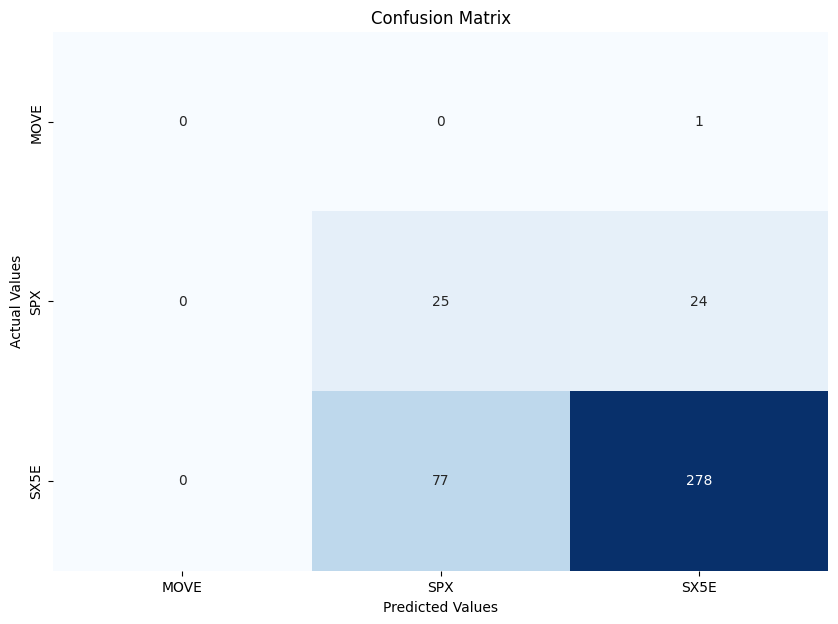

{np.int64(0): 'MOVE', np.int64(1): 'SPX', np.int64(2): 'SX5E'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 355, (1,): 49, (0,): 1}


In [180]:
plot_confusion_matrix(y_val, y_pred_mnr, dict_classes)

In [181]:
scores = cross_val_score(mnr_cl, X, y, cv=5, n_jobs=-1)

/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1

## Random Forest Classifier
Un Bosque Aleatorio es como un equipo de toma de decisiones en grupo en el aprendizaje automático. Combina las opiniones de muchos "árboles" (modelos individuales) para hacer mejores predicciones, creando un modelo global más sólido y preciso.

La popularidad generalizada del algoritmo Random Forest se debe a su facilidad de uso y su adaptabilidad, que le permiten abordar eficazmente problemas tanto de clasificación como de regresión. La fuerza del algoritmo reside en su capacidad para manejar conjuntos de datos complejos y mitigar el sobreajuste, lo que lo convierte en una herramienta valiosa para diversas tareas de predicción en el aprendizaje automático.

Una de las características más importantes del algoritmo Random Forest es que puede manejar conjuntos de datos que contienen variables continuas, como en el caso de la regresión, y variables categóricas, como en el caso de la clasificación. Se comporta mejor en tareas de clasificación y regresión.

In [182]:
# Initialize and train the Random Forest classifier
rf_cl = RandomForestClassifier(
    n_estimators=50, 
    class_weight='balanced', 
    verbose=True
)

In [183]:
rf_cl.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


RandomForestClassifier(class_weight='balanced', n_estimators=50, verbose=True)

In [184]:
y_pred_rf = rf_cl.predict(X_val)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [185]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.04      0.08        49
           2       0.88      0.99      0.93       355

    accuracy                           0.88       405
   macro avg       0.46      0.35      0.34       405
weighted avg       0.83      0.88      0.83       405



/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

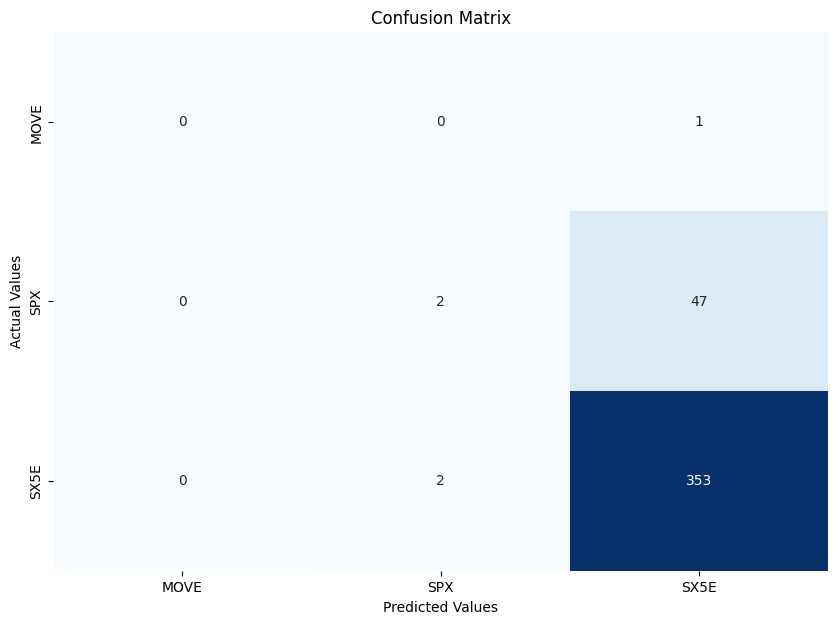

{np.int64(0): 'MOVE', np.int64(1): 'SPX', np.int64(2): 'SX5E'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 355, (1,): 49, (0,): 1}


In [186]:
plot_confusion_matrix(y_val, y_pred_rf, dict_classes)

In [187]:
scores = cross_val_score(rf_cl, X, y, cv=5 , n_jobs=-1)

/home/moruso/Documents/myvenv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [188]:
scores

array([0.84444444, 0.84444444, 0.84691358, 0.85432099, 0.8490099 ])

Newton-CG iter = 0
  Check Convergence
    max |gradient| <= tol: 0.13969971539320844 <= 0.0001 False
Newton-CG iter = 1
  Check Convergence
    max |gradient| <= tol: 0.11068005350706495 <= 0.0001 False
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 0.03648339356803204 <= 0.0001 False
Newton-CG iter = 3
  Check Convergence
    max |gradient| <= tol: 0.011847318387633836 <= 0.0001 False
Newton-CG iter = 4
  Check Convergence
    max |gradient| <= tol: 0.004889544483485033 <= 0.0001 False
Newton-CG iter = 5
  Check Convergence
    max |gradient| <= tol: 0.005218729738398603 <= 0.0001 False
Newton-CG iter = 6
  Check Convergence
    max |gradient| <= tol: 0.003714258488394611 <= 0.0001 False
Newton-CG iter = 7
  Check Convergence
    max |gradient| <= tol: 0.0009549521155831599 <= 0.0001 False
Newton-CG iter = 8
  Check Convergence
    max |gradient| <= tol: 0.0007466487966465065 <= 0.0001 False
Newton-CG iter = 9
  Check Convergence
    max |gradient| <= tol: 0.000474